# 의사결정나무 (Decision Tree)

## 1. 의사결정나무란?
- 데이터의 특징(feature) 값을 기준으로 데이터를 반복적으로 분할하여 나무 모양의 구조를 형성합니다.
- 각 **내부 노드**는 특정 특징에 대한 결정, 분기(branch)는 결정의 결과, 리프 노드(leaf node)는 최종 예측 값(또는 클래스)을 나타냅니다.
- 새로운 규칙 조건마다 규칙 노드 기반의 서브 트리가 생성되지만, 분류 결정 방식이 복잡하다는 것이며, 과적합 발생
- 트리의 깊이가 깊어질 수록 결정 트리의 예측 성능이 저하

## 2. 의사결정나무의 구성 요소

1. **루트 노드 (Root Node)**: 나무의 시작점으로, 전체 데이터셋을 나타냄.
2. **내부 노드 (Internal Nodes)**: 특징에 따라 데이터를 분할하는 지점.
3. **분기 (Branches)**: 결정의 결과를 나타냄.
4. **리프 노드 (Leaf Nodes)**: 최종 예측 값(클래스 또는 회귀 값)을 나타냄.

## 3. 의사결정나무의 작동 원리

1. **분할(Splitting)**: 각 노드에서 특징(feature)을 기준으로 데이터를 나눔. 이때 정보 이득(information gain)을 최대화하거나 불순도를 최소화하는 특징이 선택됨.
2. **불순도 측정**:
   - **지니 불순도(Gini Impurity)**:
     $Gini = 1 - \sum_{i=1}^{C} p_i^2$
   - **엔트로피(Entropy)**:
     $Entropy = -\sum_{i=1}^{C} p_i \log_2(p_i)$
     여기서 \( p_i \)는 클래스 \( i \)의 확률, \( C \)는 클래스의 총 개수.
3. **분할 종료 조건**:
   - 최대 깊이에 도달했을 때.
   - 노드에 포함된 샘플의 수가 최소값보다 작아졌을 때.
   - 추가 분할이 성능 향상에 기여하지 않을 때.

## 4. 의사결정나무의 장점

1. **해석 용이성**:
   - 모델 구조가 직관적이며, 시각화를 통해 쉽게 이해 가능.
2. **비선형 데이터 처리**:
   - 비선형 관계를 효과적으로 모델링 가능.
3. **특징 선택 기능**:
   - 분할 과정에서 중요한 특징을 자동으로 선택.
4. **비모수적 특성**:
   - 데이터의 분포에 대한 가정이 필요 없음(예: 정규분포 필요 없음).
5. **결측치 처리**:
   - 결측값이 있는 데이터도 자연스럽게 처리 가능.

## 5. 의사결정나무의 단점

1. **과적합(Overfitting)**:
   - 나무가 너무 깊어지면 훈련 데이터의 잡음까지 학습할 가능성이 있음.
   - 가지치기(pruning)나 최대 깊이를 제한하여 완화 가능.
2. **특징 편향**:
   - 고유 값이 많거나 분산이 큰 특징에 편향될 가능성 있음.
3. **불안정성**:
   - 데이터의 작은 변화에도 나무 구조가 크게 달라질 수 있음.
4. **성능 제한**:
   - 선형 데이터에서는 성능이 떨어질 수 있음.

## 6. 의사결정나무의 성능이 좋은 경우

1. **비선형 데이터**:
   - 특징과 타겟 간의 관계가 복잡하거나 비선형일 때.
2. **강력한 특징이 있는 경우**:
   - 일부 특징이 강한 예측 신호를 가지는 경우.
3. **결측치가 있는 데이터**:
   - 결측치가 있는 경우에도 분할을 통해 자연스럽게 처리 가능.
4. **소규모 데이터셋**:
   - 데이터가 적은 경우에도 간단하고 빠르게 학습 가능.

## 7. 의사결정나무의 성능에 대한 설명

- **과적합 문제**:
  - 나무가 너무 깊으면 학습 데이터에 과적합되어 테스트 데이터에서 성능이 떨어질 수 있음.
  - 이를 방지하기 위해 가지치기(pruning)나 하이퍼파라미터(최대 깊이, 최소 샘플 수 등) 조정을 통해 일반화를 향상시킬 수 있음.
- **편향-분산 트레이드오프(Bias-Variance Tradeoff)**:
  - 얕은 나무는 과소적합(높은 편향)을 초래할 수 있으며, 깊은 나무는 과적합(높은 분산)을 초래할 수 있음.
- **앙상블 기법에서의 활용**:
  - 랜덤 포레스트(Random Forest)나 그래디언트 부스팅(Gradient Boosting)과 같은 앙상블 기법에서 기본 모델로 자주 사용되며, 단독으로 사용할 때의 단점을 보완 가능.

---

## 8. Python 구현 예시

```python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드
data = load_iris()
X, y = data.data, data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정나무 모델 학습
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = clf.predict(X_test)
print("정확도:", accuracy_score(y_test, y_pred))

# 의사결정나무 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

# 1) Model
dt = DecisionTreeClassifier(random_state = 1234)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
accuracy_score1 = accuracy_score(y_test, dt_pred)



0.9370569620253164
{'max_depth': 8, 'min_samples_split': 16}


<Axes: xlabel='None', ylabel='None'>

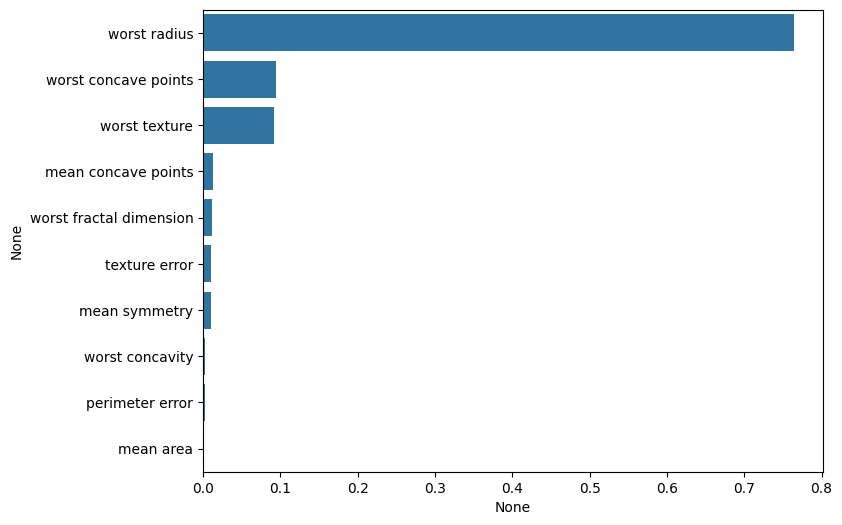

In [52]:
# 2) Param Grid 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

dt_grid = GridSearchCV(dt, params, cv = 5, scoring = 'accuracy')
dt_grid.fit(x_train, y_train)

print(dt_grid.best_score_)
print(dt_grid.best_params_)

# 3. feature_importance 
best_dt = dt_grid.best_estimator_
dt_pred2 = best_dt.predict(x_test)
accuracy2 = accuracy_score(y_test, dt_pred2)

feature_values = best_dt.feature_importances_
feature_20 = pd.Series(feature_values, index = cancer.feature_names).sort_values(ascending= False)[:10]

plt.figure(figsize = (8,6))
sns.barplot(x = feature_20, y = feature_20.index)

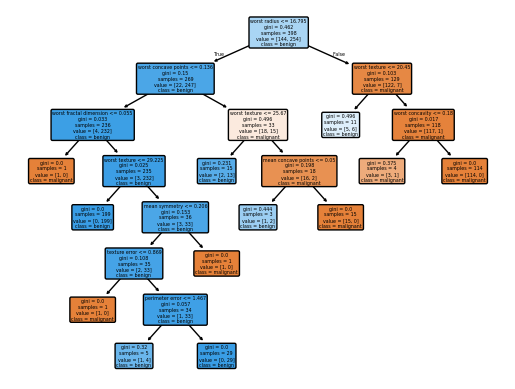

In [53]:
# 결정트리 시각화 plot_tree, export_text 

plot_tree(best_dt, class_names = cancer.target_names, feature_names = cancer.feature_names , 
         impurity = True, filled= True, rounded = True)
plt.show()


# **앙상블 (Ensemble)**
앙상블은 여러 개의 분류기(Classifier)를 결합하여 성능을 향상시키는 방법으로, 집단 지성의 개념을 모델 학습에 적용한 기술입니다. 대표적으로 **Voting**, **Bagging**, **Boosting**이 있습니다.

## 1. **Voting**
### 개념:
- 서로 다른 알고리즘 기반의 분류기를 결합하여 최종 예측 결과를 도출하는 방식.
- 결과를 **다수결**(Hard Voting) 또는 **예측 확률 평균**(Soft Voting)으로 결정.

### 특징:
- 서로 다른 모델(예: 로지스틱 회귀, 랜덤포레스트, SVM 등)을 사용하여 다양한 관점에서 데이터를 학습.
- 개별 모델의 결과를 결합하여 일반화 성능을 높임.

### 장점:
- 간단한 구현.
- 여러 알고리즘을 결합함으로써 상호 보완적인 성능 향상.
- 다양한 관점에서 데이터를 분석.

### 단점:
- 성능이 낮은 분류기가 포함되면 결과에 악영향을 미칠 수 있음.
- 분류기마다 학습 시간과 자원이 많이 소요될 수 있음.

### 사용 용도:
- 다양한 머신러닝 알고리즘의 조합을 통해 안정적이고 견고한 결과를 원하는 경우.
- 예: 금융 데이터 예측, 의료 진단 등.
## Voting 유형 (Viting Classifier) 
    1) Hard Voting- 다수결원칙, 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선청 
    2) Soft Voting - 분류기들의 레이블 값 결정 확률을 모두 더하고, 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 보팅 결과값

---

## 2. **Bagging**
### 개념:
- 같은 알고리즘 기반의 여러 분류기를 사용하지만, 데이터 샘플링을 다르게 하여 각각의 분류기를 학습시킴.
- 대표적인 알고리즘: **랜덤 포레스트(Random Forest)**.
- 랜덤 포레스트 : 여러 개의 결정 트리 분류기가 전체 데이터에서 Bagging 방식으로 (여러개의 분류기를 만들어서 보팅하는 알고리즘)
  여러개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행 

### 특징:
- 데이터 샘플링 시 **부트스트래핑(Bootstrapping)** 기법을 사용하여 데이터를 랜덤하게 복원 추출.
- **부트스트래핑(Bootstrapping)** : 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트 
- 각 분류기의 예측을 평균 또는 투표로 결합.

### 장점:
- 데이터의 과적합(Overfitting)을 방지.
- 분류기 간의 상관성을 줄여 모델의 안정성 향상.
- 대규모 데이터에서도 효과적.

### 단점:
- 개별 모델이 모두 같은 유형이므로, 서로 다른 관점의 학습은 불가능.
- 계산 비용이 높을 수 있음.

### 사용 용도:
- 데이터의 노이즈나 과적합이 우려되는 경우.
- 예: 대규모 데이터셋에서 랜덤 포레스트를 활용한 분류 및 회귀.

---

## 3. **Boosting**
### 개념:
- 약한 학습기(Weak Learner)를 순차적으로 학습시키며, 이전 학습기의 **오류를 보완**하여 강한 학습기를 만드는 방법.
- 대표적인 알고리즘: **Gradient Boosting**, **AdaBoost**, **XGBoost**, **LightGBM**.

### 특징:
- 이전 학습기의 예측 오류를 수정하는 방식으로 점진적인 성능 향상.
- 각 단계에서 잘못 예측된 데이터에 더 높은 가중치를 부여하여 학습.

### 장점:
- 높은 예측 성능.
- 잘못된 예측을 지속적으로 보완하여 최적화된 결과 도출.
- 적은 데이터에서도 효과적.

### 단점:
- 과적합 위험이 있음 (특히 작은 데이터셋에서).
- 계산 비용이 매우 높을 수 있음.
- 순차적 학습으로 인해 병렬화가 어려움.

### 사용 용도:
- 예측 성능이 매우 중요한 경우.
- 예: Kaggle 대회, 이미지 인식, 텍스트 분석 등.

---

## **Voting, Bagging, Boosting의 비교**

| **특징**        | **Voting**                         | **Bagging**                        | **Boosting**                       |
|------------------|------------------------------------|------------------------------------|------------------------------------|
| **기법**         | 서로 다른 알고리즘 결합             | 동일 알고리즘, 데이터 샘플링 차이   | 이전 학습기의 오류를 보완           |
| **대표 알고리즘**| Hard/Soft Voting                  | Random Forest                     | Gradient Boosting, AdaBoost        |
| **장점**         | 간단하고 직관적                   | 과적합 방지, 안정적 성능            | 높은 예측 성능, 점진적 보완         |
| **단점**         | 낮은 성능 모델 포함 시 성능 저하    | 계산 비용 증가                     | 과적합 위험, 높은 계산 비용         |
| **사용 용도**    | 다양한 관점의 결합이 필요한 경우    | 노이즈와 과적합이 우려되는 경우     | 예측 성능이 중요한 경우             |



#### **Voting Classifier**

In [54]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

lr = LogisticRegression(solver = 'liblinear')
knn = KNeighborsClassifier(n_neighbors= 8)

# Voting Classifier 
soft_voting = VotingClassifier(estimators= [('Lr', lr) , ('KNN',knn)] , 
                               voting = 'soft')

# 두가지 모델에 fit 
soft_voting.fit(X_train, y_train)
pred = soft_voting.predict(X_test)

print(accuracy_score(y_test, pred))

models = [lr, knn]
for model in models : 
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuuracy_result = accuracy_score(y_test, pred)
    print(acuuracy_result)

print("""해석 : Logistic Regression 과 KNN의 장점을 결합한 Voting 모델이 앙상블 기법으로 개별 모델의 약점을 
      상호보완한 것이다. """)

0.956140350877193
0.9473684210526315
0.9385964912280702
해석 : Logistic Regression 과 KNN의 장점을 결합한 Voting 모델이 앙상블 기법으로 개별 모델의 약점을 
      상호보완한 것이다. 


### **Random Forest (Bagging)** 
- 결정 트리의 단점인 오버피팅 문제를 완화시켜주는 형태의 트리 모델
- 결정 트리의 집합체로, 다양한 트리가 있기 때문에 오버피팅의 위험을 낮을 수 있다. 매번 다른 일부의 데이터를 사용하여 다른 트리를 만들어낸다.
  예측력이 다소 떨어지는 수많은 트리들이 함께 모여 중위값을 찾아내면 오버피팅을 막는데 효율적.예를 들어, 1만 행 중 2/3에 해당하는 데이터만 사용
  각 트리에서 매번 다르게 추출된 2/3에 해당하는 데이터가 사용되어, 다른 결과의 트리가 많들어짐
- 각 트리에서는 그 중 일부의 변수들만 매번 다르게 추출하여 트리를 만들어내기 때문에, 하나의 변수에 너무 큰 무게가 실린 모델은 역시 오버 피팅을 불러올 수 있으므로, 며쳠ㅊ 트리에서 해당 변수를 제외해서 다른 변수들에도 더 무게가 실릴수 있도록 하면 오버피팅을 피할 수 있음 
#### **장점** 
결정 트리와 마찬가지로 outlier에 거의 영향을 받지 않음, 선형/비선형 데이터에 상관없이 잘 작동
#### **단점** 
학습 속가 느리며, 수많은 트리를 동원하기 때문에 모델에 대한 해석이 어려움 
#### **적용** 
- 종속변수가 연속형, 범주형
- Ouliter가 문제가 되는 경우 선형 모델보다 좋은 대안이 됨
- 오버피팅 문제로 결정 트리를 사용하기 어려울 때 랜덤 포레스트 사용
  -> 훈련데이터에 과도하게 적응하여 새로운 데이터에 성능이 저하됨
    1. 결정 트리의 오버피팅 문제
       - 과도한 분할로 트리의 깊이가 깊어지고, 각 리프 노트가 매우작은 데이터만을 포함
       - 훈련 데이터에 지나치게 맞춤
       - 데이터가 적을때, 특징이 많고 복잡할 때 >> 훈련 데이터에서는 성능이 높지만, 테스트 정확도가 떨어져 일반화 안됨
    2. 오버피팅 완화법
       - max_depth 제한
       - min_sample_leaf : 샘플 최소 개수 설정, 지나치게 작은 leaf 노드 방지
       - pre-pruning : 사전 가지 치기
       - 앙상블 기법 : 랜덤 포레스트나 그래디언트 부스팅 기법
       - 교차 검증 : 여러번 나눠서 학습하고 과적합을 방지하여 일반화 성능을 확인 

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/car.csv'
data = pd.read_csv(file_url)
df = data.copy()

In [143]:
# 전처리 
df[['engine','engine_unit']] = df['engine'].str.split(' ', expand = True)
df['engine'] = df['engine'].astype('float32')

In [144]:
df['engine_unit'].unique() ## nan 존재 
df.drop('engine_unit', axis = 1, inplace = True) 

In [145]:
df['max_power'] = df['max_power'].str.split(' ' , expand = True)[0]

# 숫자 변환이 안되는 경우 숫자면 숫자로 주고, 아니면 np.Nan 
def isFloat(value) : 
    try : 
        float(value)
        return float(value)
    except ValueError : 
        return np.nan 

df['max_power'] = df['max_power'].apply(isFloat)

In [146]:
# mileage 전처리 
df['mileage'] = df['mileage'].str.split(' ', expand = True)[0].astype('float32')

# 원래 mileage 의 단위가 다르기 때문에 단위별로 숫자를 변환 
def mile(x) : 
    if x['fuel'] == 'Petrol' : 
        return x['mileage'] / 80.43
    elif x['fuel'] == 'Diessel' : 
        return x['mileage'] / 73.56
    elif x['fuel'] == 'LPG' : 
        return x['mileage'] / 40.85
    else : 
        return x['mileage'] / 44.23

df['mileage'] = df.apply(mile, axis = 1)

In [147]:
# torque 처리 
df['torque'] = df['torque'].str.upper()

# torque Unit 생성 
df['torque_unit'] = df['torque'].apply(
                                        lambda x: 'Nm' if isinstance(x, str) and 'NM' in x.upper() 
                                                  else ('kgm' if isinstance(x, str) and 'KGM' in x.upper() else None))
#df['torque_unit'].unique()
#df[df['torque_unit'].isna()]['torque'].unique()

df['torque'].fillna('Nm', inplace = True)

In [148]:
def split_num(x) : 
    x = str(x) # 문자형태로 변환 
    for i, j in enumerate(x) : 
        if j not in '0123456789' : 
            cut = i 
            break
    return x[:cut]

df['torque'] = df['torque'].apply(split_num)
df['torque'] = df['torque'].replace('', np.nan).astype('float32')

In [152]:
def torque_trans(x) : 
    if x['torque_unit'] == 'kgm' : 
        return x['torque'] * 9.8066
    else : 
        return x['torque']

df['torque'] = df.apply(torque_trans, axis = 1)
df.drop('torque_unit', axis = 1, inplace  = True)

In [163]:
## name 전처리 
df['name'] = df['name'].str.split(expand = True)[0]
df['name'] = df['name'].apply(lambda x : 'Land Rover' if x == 'Land' else x )

In [169]:
# 결측처리와 더미 변수 

#1) 변수별 결측치의 평균 확인 
df.isna().mean() 
# 자동차의 스펙 관련된 결측을 평균값으로 치환하는 경우 오히려 노이즈 역할만 할 가능성도 높음 

#2) Dummies 변환 
df2 = pd.get_dummies(df, columns  = ['name','fuel','seller_type','transmission','owner'] , drop_first= True, dtype = 'int')

In [176]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(df2.drop('selling_price', axis=1), df2['selling_price'], test_size=0.2, random_state=100)


rf = RandomForestRegressor(random_state = 1234)
## 교차 검증 : 데이터를 K개로 쪼개어서 그 중 하나씩 선택하여 시험셋으로 사용하되, K번 반복과정
kfold = KFold(n_splits= 5, shuffle = True , random_state =1234)

# 평균제곱오차(평가 지표)
scores = cross_val_score(rf, X_train, y_train, cv = kfold , scoring = 'neg_mean_squared_error')

print(-1*np.mean(scores))

22354717908.90104


In [178]:
## Grid_Search 

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

rf_grid = GridSearchCV(rf , params, cv = 5,  refit = True)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_)

{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [182]:
# Best_param 을 찾아서 다시 예측 
best_rf = RandomForestRegressor(n_estimators = 12, max_depth = 8, min_samples_leaf =8 ,min_samples_split = 100 )
best_rf.fit(X_train, y_train)
pred = best_rf.predict(X_test)

print(mean_squared_error(y_test, pred)) 

63076526807.27243


<Axes: xlabel='None', ylabel='None'>

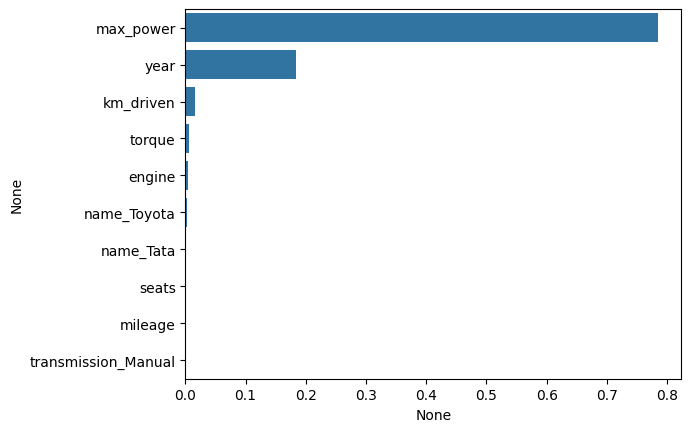

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_values = best_rf.feature_importances_
fit_importance = pd.Series(feature_values, index = X_train.columns)
fit_importance_10 = fit_importance.sort_values(ascending = False)[:10]

sns.barplot(x = fit_importance_10, y = fit_importance_10.index) 

### **Xgboost (Boosting)** 
- Gradient Boosting의 확장 형태
- Boosting : 순차적 학습을 통해 모델의 오류를 보안 (Ada Boost,XGboost, LightGBM)으로 이전 모델이 만든 오류를 다음 모델이 보완하도록 설계하며, 가중치를 부여하여 후속 모델이 샘플들을 더 잘 예측하도록한다. 순차적 학습으로 과적합의 위험이 있지만, 정규화 및 파라미터 듀닝을 통해 제어가능
#### **장점** 
- Regularization (정규화): L1, L2 정규화를 지원해 과적합을 방지.
- 병렬 처리: Boosting 방식이지만 병렬 처리를 통해 학습 속도가 빠름.
- Tree Pruning (나무 가지치기): 과적합을 방지하기 위해 최대 깊이를 제한하거나 가지치기를 수행.
- Custom Loss Function:사용자 정의 손실 함수를 지원.
- Early Stopping: 성능이 개선되지 않으면 학습을 조기 종료.
- 예측 속도가 빠르고, 변수 종류가 많고 데이터가 클수록 상대적으로 뛰어난 성능
#### **단점** 
- 복잡한 모델인 만큼, 해석에 어려움
- 하이퍼파라미터 튜닝이 까다로움 


In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)

In [198]:
df = data.copy()
df.describe()
df.isna().mean()

# 중요도와 관련된 변수들은 결측치를 제거하는 방향 : 중요도 X점수로 계산하기 때문에, 평가 점수에 관한 변수는 무응답을 하나의 응답종류로 주주
df2 = df.dropna(subset=['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests','attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important'])

In [199]:
# 1) Age 처리 
def age_gap(x):
    if x['age'] == -99:
        return -99
    elif x['age_o'] == -99:
        return -99
    elif x['gender'] == 'female':
        return x['age_o'] - x['age']
    else:
        return x['age'] - x['age_o']
df2['age_gap'] = abs(df2.apply(age_gap, axis = 1))

In [201]:
# 2)race 처리 

# 본인과 상대방 인종이 같으면 1, 다르면 -1, 결측치 -99 
def race_convert(x) : 
    if x['race'] == -99 :
        return -99 
    elif x['race_o'] == -99 :
        return -99 
    elif x['race'] == x['race_o'] :
        return 1 
    else :
        return -1 

df2['same_race'] = df.apply(race_convert, axis =1)

# 동일 인종이면 양수, 아지면 음수 
def same_race_point(x) : 
    if x['same_race'] == -99: 
        return -99 
    else : 
        return x['same_race'] * x['importance_same_race']

df2['same_race_point'] = df2.apply(same_race_point, axis = 1)

In [205]:
# 3) attractive, sincere 등 평가/중요도 변수 (평가점수 * 중요도)

def rating(df, importance, score) : 
    if df[importance] == -99 : 
        return -99
    elif df[score] == -99 :
        return -99 
    else : 
        return df[importance] * df[score]

partner_imp = df2.columns[8:14]      # 상대방의 중요도
partner_rate_me = df2.columns[14:20] # 본인에 대한 상대방의 평가

my_imp = df2.columns[20:26]          # 본인의 중요도
my_rate_partner = df2.columns[26:32] # 상대방에 대한 본인의 평가

# 평가점수 * 중요도를 받아줄 새변수 이름 
new_label_partner = ['attractive_p', 'sincere_partner_p', 'intelligence_p', 'funny_p', 'ambition_p', 'shared_interests_p']
new_label_me = ['attractive_m', 'sincere_partner_m', 'intelligence_m', 'funny_m', 'ambition_m', 'shared_interests_m']

# Zip 함수 : for문에 리스트 3개를 동시에 사용가능 

for i, j, k in zip(new_label_me, my_imp, my_rate_partner) : 
    df2[i] = df2.apply(lambda x : rating(x, j, k), axis = 1)

In [207]:
# dummies 
df3 = pd.get_dummies(df2, columns = ['race','race_o','gender'], drop_first= True)

#### **모델링 평가** 

In [221]:
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df3.drop('match',axis=1), df3['match'], test_size=0.2, random_state=100) 

# Model 
xgb = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state=100)
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

print('정확도', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# precision (정밀도) : 1로 예측한 경우, 실제 얼마나 1인가 TP / TP + FP (FP가 커질수록 정밀도는 낮아짐) : 1종 오류 
# recall(재현율) : 실제 1인것중 얼만큼 1로 예측했는가 TP / TP + FN 

# Precision 1: 1로 예측한 데이터가 64% 
# Recall1 : 실제 1인 것들 중 45%만 예측 

정확도 0.8720787207872078
[[1300   65]
 [ 143  118]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1365
           1       0.64      0.45      0.53       261

    accuracy                           0.87      1626
   macro avg       0.77      0.70      0.73      1626
weighted avg       0.86      0.87      0.86      1626



# 경사하강법 (Gradient Descent)

## 1. 경사하강법이란?
- 경사하강법은 **최적화 알고리즘**으로, 모델의 **손실 함수(Loss Function)**를 최소화하기 위해 사용됩니다.
- 반복적으로 가중치(또는 매개변수)를 업데이트하면서 **기울기(Gradient)**를 따라 이동하여 최적의 값을 찾습니다.
- 선형 회귀, 로지스틱 회귀, 신경망 등 머신러닝 모델의 학습 과정에서 필수적으로 사용됩니다.

---

## 2. 경사하강법의 원리
1. **초기화 (Initialization)**:
   - 가중치(또는 매개변수)를 임의의 값으로 초기화합니다.
2. **기울기 계산 (Compute Gradient)**:
   - 손실 함수 $J(\theta)$를 매개변수 $(\theta)$에 대해 미분하여 기울기를 계산합니다.
   - 기울기는 손실 함수가 가장 빠르게 증가하는 방향을 나타냅니다.
3. **매개변수 업데이트 (Update Parameters)**:
   - 학습률(Learning Rate, \(\alpha\))을 사용하여 매개변수를 업데이트합니다.
  $\theta = \theta - \alpha \cdot \nabla J(\theta)$
   - $(\nabla J(\theta)$: 손실 함수의 기울기
   - $(\alpha\)$: 학습률 (작으면 학습이 느리고, 크면 발산 가능)
4. **반복 (Iterate)**:
   - 손실 함수 값이 수렴하거나 최대 반복 횟수에 도달할 때까지 위 과정을 반복합니다.

---

## 3. 경사하강법의 종류
| **방법**           | **특징**                                                                                                                                       | **장점**                                                                                                   | **단점**                                                                                     |
|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **배치 경사하강법** (Batch Gradient Descent) | 모든 데이터를 사용해 한 번에 기울기를 계산.                                                                                           | 수렴 방향이 안정적이고, 최적값을 보장.                                                                         | 데이터셋이 클 경우 메모리와 계산 부담 큼.                                                      |
| **확률적 경사하강법** (Stochastic Gradient Descent, SGD) | 데이터를 하나씩 사용해 기울기를 계산.                                                                                               | 계산이 빠르고 메모리 효율적.                                                                                 | 진동이 심해 최적값 근처에서 불안정.                                                             |
| **미니배치 경사하강법** (Mini-Batch Gradient Descent) | 데이터를 작은 배치(batch) 단위로 나누어 기울기를 계산.                                                                                   | 배치와 SGD의 장점을 결합. 계산 부담이 적고, 수렴도 안정적.                                                       | 적절한 배치 크기 설정이 중요.                                                                   |

---

## 4. 경사하강법 알고리즘 예제
손실 함수 \( J(\theta) = \theta^2 \)를 최소화하는 과정:
1. 초기값: \(\theta_0 = 4\)
2. 학습률: \(\alpha = 0.1\)

| **반복 횟수** \(t\) | **기울기** (\(\nabla J(\theta_t)\)) | **업데이트 전** (\(\theta_t\)) | **업데이트 후** (\(\theta_{t+1}\)) | **손실 함수 값** (\(J(\theta_{t+1})\)) |
|----------------------|------------------------------------|--------------------------------|----------------------------------|-----------------------------------|
| 1                    | \(2 \cdot 4 = 8\)                | 4                              | \(4 - 0.1 \cdot 8 = 3.2\)        | \(3.2^2 = 10.24\)                 |
| 2                    | \(2 \cdot 3.2 = 6.4\)            | 3.2                            | \(3.2 - 0.1 \cdot 6.4 = 2.56\)   | \(2.56^2 = 6.5536\)               |
| 3                    | \(2 \cdot 2.56 = 5.12\)          | 2.56                           | \(2.56 - 0.1 \cdot 5.12 = 2.048\)| \(2.048^2 = 4.1943\)              |

---

## 5. 경사하강법의 시각적 설명

### 1) 손실 함수와 경사하강법의 경로
- \( J(\theta) = \theta^2 \)와 같이 볼록 함수에서 경사하강법이 작동하는 과정을 나타냄.

```python
import numpy as np
import matplotlib.pyplot as plt

# 손실 함수와 기울기 계산
theta = np.linspace(-4, 4, 100)
cost = theta**2
gradient = 2 * theta

# 초기값
theta_0 = 4
alpha = 0.1
theta_vals = [theta_0]
cost_vals = [theta_0**2]

# 경사하강법 반복
for _ in range(10):
    grad = 2 * theta_vals[-1]
    theta_next = theta_vals[-1] - alpha * grad
    theta_vals.append(theta_next)
    cost_vals.append(theta_next**2)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(theta, cost, label="Loss Function: $J(\\theta) = \\theta^2$")
plt.scatter(theta_vals, cost_vals, color='red', label="Gradient Descent Steps")
plt.plot(theta_vals, cost_vals, color='red', linestyle='--')
plt.xlabel("$\\theta$")
plt.ylabel("$J(\\theta)$")
plt.title("Gradient Descent Path on Loss Function")
plt.legend()
plt.grid()
plt.show()


In [217]:
# Grid_Search - Best Param 찾기 

parameters = {
              'learning_rate': [0.01, 0.1, 0.3],
              'max_depth': [5,7,10],
              'subsample': [0.5,0.7,1],                 
              'n_estimators': [300, 500, 1000]
                }

gs_model = GridSearchCV(xgb, parameters, cv = 5, refit = True, scoring ='f1')
gs_model.fit(X_train, y_train)
print(gs_model.best_params_)

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1}


<Axes: xlabel='values', ylabel='feature'>

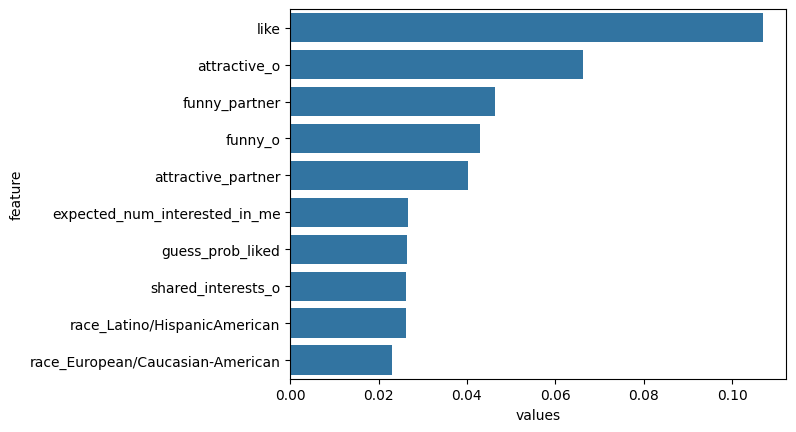

In [228]:
import xgboost as xgb
xgb2 = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 5, n_estimators = 500, subsample =1, random_state=100)

xgb2.fit(X_train, y_train)
pred = xgb2.predict(X_test)

feature_df = pd.DataFrame( {'feature' : X_train.columns ,'values': xgb2.feature_importances_ }) 
top_10 = feature_df.sort_values(by = 'values' , ascending = False)[:10]

sns.barplot(x = top_10['values'], y = top_10['feature'])